In [14]:
import scopesim as sim
from astropy import units as u
from matplotlib import pyplot as plt

In [15]:
cmd = sim.UserCommands(
    use_instrument="METIS",
    set_modes=['lms'],
    properties={
        "!OBS.wavelen": 3.555,

        # These !SIM.spectral_* properties make the simulation faster, but less precise.
        # Comment them out for your final simulations.
        # "!SIM.spectral_bin_width": 1e-3,
        # "!SIM.spectral_resolution": 1000,
       
    })

lms = sim.OpticalTrain(cmd)
src = sim.source.source_templates.star(flux=0.01 * u.Jy, x=0, y=0)

py.warnings - WARNING: /root/miniconda3/envs/scopesim/lib/python3.10/site-packages/scopesim/effects/metis_lms_trace_list.py:409: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  thematrix[i, j] = (subpoly["P3"][sel_ij] * angle**3 +

py.warnings - WARNING: /root/miniconda3/envs/scopesim/lib/python3.10/site-packages/scopesim/effects/metis_lms_trace_list.py:291: DeprecationWarning: The fov_grid method is deprecated and will be removed in a future release. The functionality should be moved somewhere else.
  self.meta["fov"] = self.fov_grid()

py.warnings - WARNING: /root/miniconda3/envs/scopesim/lib/python3.10/site-packages/scopesim/effects/spectral_trace_list.py:163: DeprecationWarning: The fov_grid method is deprecated and will be removed in a future release. The functionality should be moved somewhere else.
  fov = 

In [3]:
lms.observe(src, update=True)

py.warnings - WARNING: /root/miniconda3/envs/scopesim/lib/python3.10/site-packages/scopesim/effects/metis_lms_trace_list.py:76: DeprecationWarning: The fov_grid method is deprecated and will be removed in a future release. The functionality should be moved somewhere else.
  volumes = [spectral_trace.fov_grid()



 FOV effects:   0%|          | 0/2 [00:00<?, ?it/s]

astar.scopesim.effects.psfs - Interpolating PSF onto (5516, 143, 219) cube


 PSF slices:   0%|          | 0/5516 [00:00<?, ?it/s]

 Spectral Traces:   0%|          | 0/28 [00:00<?, ?it/s]

astar.scopesim.optics.image_plane - No BUNIT found in added HDU.


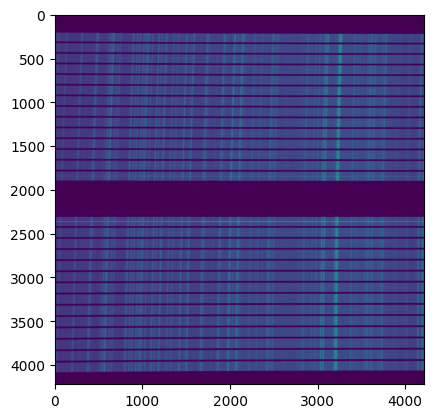

In [4]:
ip = lms.image_planes[0]

plt.imshow(ip.data)

In [5]:
hdul = lms.readout(exptime=3600.)[0]

astar.scopesim.effects.electronic - Requested exposure time: 3600.000 s
astar.scopesim.effects.electronic - Required DIT without saturation: 2394.411 s
astar.scopesim.effects.electronic - Exposure parameters: DIT = 1800.000 s, NDIT = 2
astar.scopesim.effects.electronic - Total exposure time: 3600.000 s
astar.scopesim.detector.detector_manager - Extracting from 4 detectors...
astar.scopesim.effects.electronic - Applying gain [1] mapping contents:
├─1: 2.0
├─2: 2.0
├─3: 2.0
└─4: 2.0
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Applying gain [1] mapping contents:
├─1: 2.0
├─2: 2.0
├─3: 2.0
└─4: 2.0
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Applying gain [1] mapping contents:
├─1: 2.0
├─2: 2.0
├─3: 2.0
└─4: 2.0
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Applying gain [1] mapping contents

In [6]:
len(hdul)

5

In [7]:
data_raw = hdul[1].data

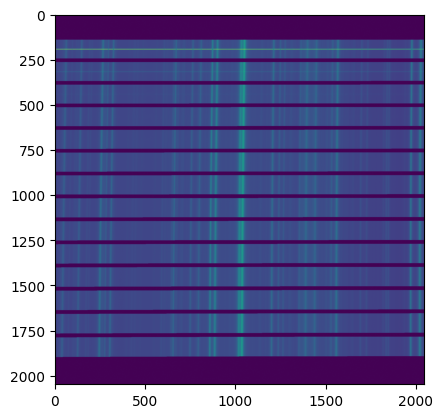

In [8]:
plt.imshow(data_raw)

In [9]:
rectified = lms["lms_spectral_traces"].rectify_cube(hdul)

astar.scopesim.effects.metis_lms_trace_list - Computing interpolation functions
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 1
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 2
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 3
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 4
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 

In [10]:
rectified.data.shape

(5517, 28, 110)

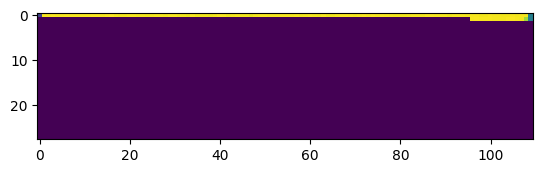

In [11]:
plt.imshow(rectified.data[3,:,:])

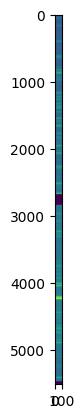

In [12]:
plt.imshow(rectified.data[:,3,:])

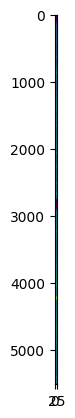

In [13]:
plt.imshow(rectified.data[:,:,3])